# Comparazioni

In [9]:
import numpy as np
import pandas as pd
import shutil
import seaborn as sns
import os
import matplotlib.dates as dates
from pathlib import Path, PosixPath
import matplotlib.pyplot as plt

%matplotlib inline
sns.set()

In [2]:
# Per rimuovere la griglia dal grafico
# sns.set_style("white")

## Download data

In [3]:
dirpath = os.path.join('COVID-19')
if os.path.exists(dirpath) and os.path.isdir(dirpath):
    shutil.rmtree(dirpath)

!git clone https://github.com/pcm-dpc/COVID-19.git

Cloning into 'COVID-19'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 2125 (delta 4), reused 10 (delta 2), pack-reused 2095
Receiving objects: 100% (2125/2125), 50.74 MiB | 5.14 MiB/s, done.
Resolving deltas: 100% (1509/1509), done.


## Read data

In [39]:
# Nazionale
country_df = pd.read_csv('./COVID-19/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv', index_col='data', parse_dates=True)

In [40]:
# Regionale
region_df = pd.read_csv('./COVID-19/dati-regioni/dpc-covid19-ita-regioni.csv', index_col='data', parse_dates=True)
group = region_df.groupby('denominazione_regione')['denominazione_regione'].count()

piemonte_df = region_df.loc[region_df['denominazione_regione'] == 'Piemonte']
lombardia_df = region_df.loc[region_df['denominazione_regione'] == 'Lombardia']
emilia_df = region_df.loc[region_df['denominazione_regione'] == 'Emilia-Romagna']

In [41]:
country_df.drop(['stato', 'note_it', 'note_en'], axis=1, inplace=True)
piemonte_df.drop(['stato', 'note_it', 'note_en'], axis=1, inplace=True)
lombardia_df.drop(['stato', 'note_it', 'note_en'], axis=1, inplace=True)
emilia_df.drop(['stato', 'note_it', 'note_en'], axis=1, inplace=True)

/opt/anaconda3/envs/ai/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [42]:
country_df.tail()

,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi
data,,,,,,,,,,,
2020-04-11 17:00:00,28144,3381,31525,68744,100269,1996,4694,32534,19468,152271,963473
2020-04-12 17:00:00,27847,3343,31190,71063,102253,1984,4092,34211,19899,156363,1010193
2020-04-13 17:00:00,28023,3260,31283,72333,103616,1363,3153,35435,20465,159516,1046910
2020-04-14 17:00:00,28011,3186,31197,73094,104291,675,2972,37130,21067,162488,1073689
2020-04-15 17:00:00,27643,3079,30722,74696,105418,1127,2667,38092,21645,165155,1117404


## Totale positivi

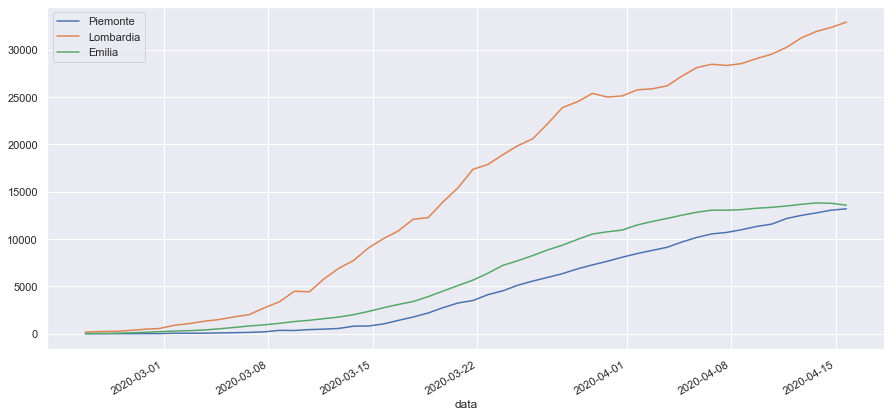

In [43]:
# country_df['totale_positivi'].plot(label='Nazione',figsize=(15,7))
piemonte_df['totale_positivi'].plot(label='Piemonte',figsize=(15,7))
lombardia_df['totale_positivi'].plot(label='Lombardia',figsize=(15,7))
emilia_df['totale_positivi'].plot(label='Emilia',figsize=(15,7))
plt.legend()

**Il numero deve andare sotto 0**

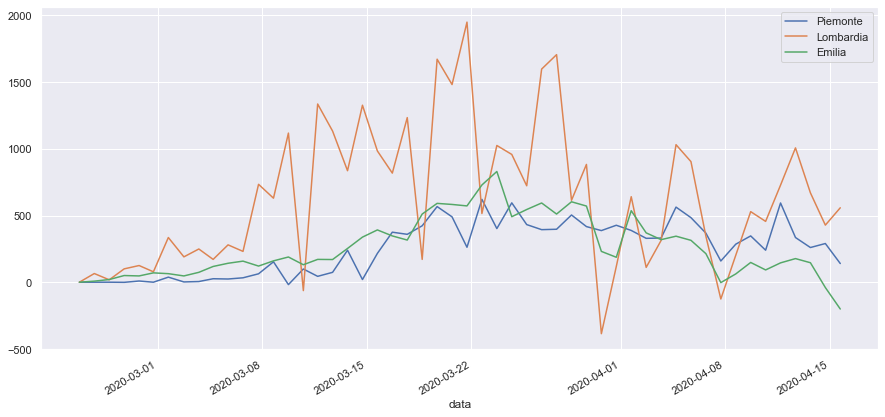

In [44]:
# country_df['variazione_totale_positivi'].plot(label='Nazione',figsize=(15,7))
piemonte_df['variazione_totale_positivi'].plot(label='Piemonte',figsize=(15,7))
lombardia_df['variazione_totale_positivi'].plot(label='Lombardia',figsize=(15,7))
emilia_df['variazione_totale_positivi'].plot(label='Emilia',figsize=(15,7))
plt.legend()

### Nuove persone positive

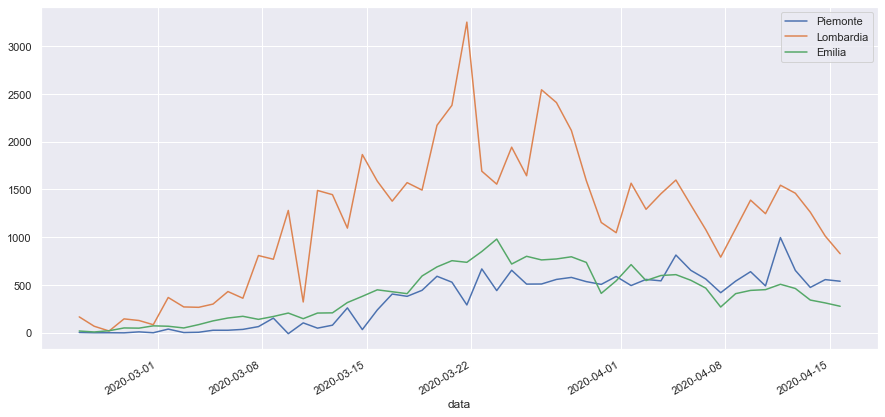

In [45]:
# country_df['nuovi_positivi'].plot(label='Nazione',figsize=(15,7))
piemonte_df['nuovi_positivi'].plot(label='Piemonte',figsize=(15,7))
lombardia_df['nuovi_positivi'].plot(label='Lombardia',figsize=(15,7))
emilia_df['nuovi_positivi'].plot(label='Emilia',figsize=(15,7))
plt.legend()

### Incremento giornaliero di tamponi

In [47]:
piemonte_df['daily_tamponi'] = piemonte_df['tamponi'] - piemonte_df['tamponi'].shift(1)
lombardia_df['daily_tamponi'] = lombardia_df['tamponi'] - lombardia_df['tamponi'].shift(1)
emilia_df['daily_tamponi'] = emilia_df['tamponi'] - emilia_df['tamponi'].shift(1)

/opt/anaconda3/envs/ai/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/envs/ai/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/ai/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

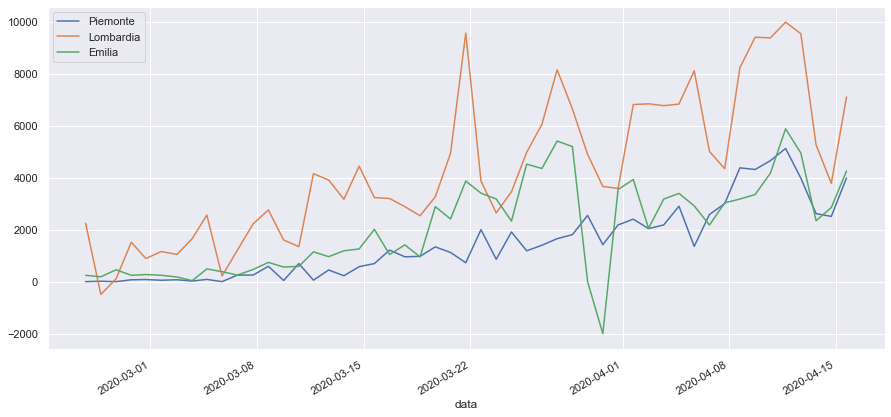

In [48]:
piemonte_df['daily_tamponi'].plot(label='Piemonte',figsize=(15,7))
lombardia_df['daily_tamponi'].plot(label='Lombardia',figsize=(15,7))
emilia_df['daily_tamponi'].plot(label='Emilia',figsize=(15,7))
plt.legend()

### Nuove persone positive normalizzato con il numero di tamponi fatti

In [50]:
piemonte_df['normed_tamponi'] = piemonte_df['nuovi_positivi'] / piemonte_df['daily_tamponi']
lombardia_df['normed_tamponi'] = lombardia_df['nuovi_positivi'] / lombardia_df['daily_tamponi']
emilia_df['normed_tamponi'] = emilia_df['nuovi_positivi'] / emilia_df['daily_tamponi']

/opt/anaconda3/envs/ai/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/envs/ai/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/ai/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

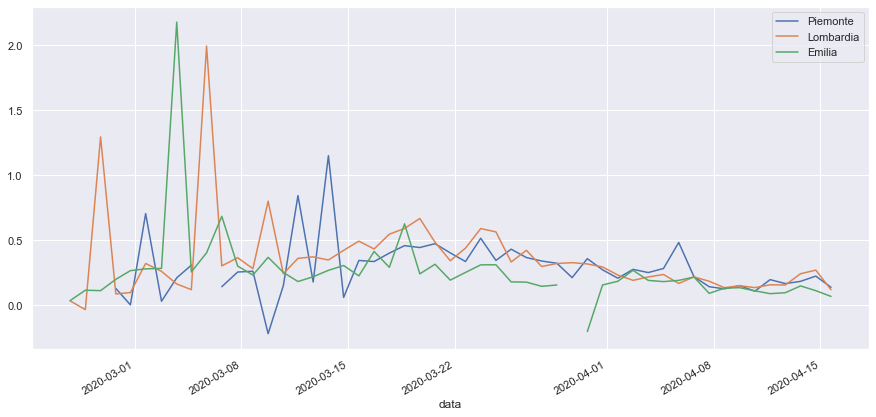

In [51]:
piemonte_df['normed_tamponi'].plot(label='Piemonte',figsize=(15,7))
lombardia_df['normed_tamponi'].plot(label='Lombardia',figsize=(15,7))
emilia_df['normed_tamponi'].plot(label='Emilia',figsize=(15,7))
plt.legend()